In [ ]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import itertools
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
df_Fake = pd.read_csv(r'Fake.csv')
df_Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_True = pd.read_csv(r'True.csv')
df_True.dtypes


title      object
text       object
subject    object
date       object
dtype: object

In [ ]:
export_df = pd.read_csv(r'export_dataframe.csv')
export_df

,text,classe
0,"['washington', 'reuters', 'head', 'conservativ...",1
1,"['washington', 'reuters', 'transgender', 'peop...",1
2,"['washington', 'reuters', 'special', 'counsel'...",1
3,"['washington', 'reuters', 'trump', 'campaign',...",1
4,"['seattle', 'washington', 'reuters', 'presiden...",1
...,...,...
38642,"['st', 'century', 'wire', 'say', 'world', 'sta...",0
38643,"['randy', 'johnson', 'st', 'century', 'wirethe...",0
38644,"['tune', 'alternate', 'current', 'radio', 'net...",0
38645,"['st', 'century', 'wire', 'say', 'new', 'front...",0


In [ ]:
# create a dataframe for real news
dataframe_real = pd.DataFrame(export_df, columns = ['text', 'classe'])
  
# selecting rows based on condition
export_real = dataframe_real.loc[dataframe_real['classe'] == 1 ]

#show dataframe
export_real

,text,classe
0,"['washington', 'reuters', 'head', 'conservativ...",1
1,"['washington', 'reuters', 'transgender', 'peop...",1
2,"['washington', 'reuters', 'special', 'counsel'...",1
3,"['washington', 'reuters', 'trump', 'campaign',...",1
4,"['seattle', 'washington', 'reuters', 'presiden...",1
...,...,...
21187,"['brussels', 'reuters', 'nato', 'ally', 'tuesd...",1
21188,"['london', 'reuters', 'lexisnexis', 'provider'...",1
21189,"['minsk', 'reuters', 'shadow', 'disused', 'sov...",1
21190,"['moscow', 'reuters', 'vatican', 'secretary', ...",1


In [ ]:
# create a dataframe for fake news 
dataframe_fake = pd.DataFrame(export_df, columns = ['text', 'classe'])
  
# selecting rows based on condition
export_fake = dataframe_fake.loc[dataframe_fake['classe'] == 0 ]

export_fake = export_fake.reset_index(drop=True)

#show dataframe
export_fake

,text,classe
0,"['donald', 'trump', 'wish', 'american', 'happy...",0
1,"['house', 'intelligence', 'committee', 'chairm...",0
2,"['friday', 'revealed', 'former', 'milwaukee', ...",0
3,"['christmas', 'day', 'donald', 'trump', 'annou...",0
4,"['pope', 'francis', 'used', 'annual', 'christm...",0
...,...,...
17450,"['st', 'century', 'wire', 'say', 'world', 'sta...",0
17451,"['randy', 'johnson', 'st', 'century', 'wirethe...",0
17452,"['tune', 'alternate', 'current', 'radio', 'net...",0
17453,"['st', 'century', 'wire', 'say', 'new', 'front...",0


In [ ]:
def join_text(text):
    text = text.split()
    l_text = [re.sub(r'\W', '', i) for i in text]
    return ' '.join(l_text)

In [ ]:
l_real = []

for i in range(len(export_real['text'])):
    resultR = join_text(export_real['text'][i])
    l_real.append(resultR)
   

In [ ]:
#l_real

In [ ]:
l_fake = []

for i in range(len(export_fake['text'])):
    resultF = join_text(export_fake['text'][i])
    l_fake.append(resultF)
    

In [ ]:
#l_fake

In [ ]:
df_True.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
df_Fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [ ]:
df_True.drop_duplicates(subset = 'text', inplace = True)
df_True.describe()

,title,text,subject,date
count,21192,21192,21192,21192
unique,20821,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Puppets resembling U.S. presidenti...,politicsNews,"December 6, 2017"
freq,14,1,11214,166


In [ ]:
df_Fake.drop_duplicates(subset = 'text', inplace = True)
df_Fake.describe()

,title,text,subject,date
count,17455,17455,17455,17455
unique,17450,17455,5,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,Add one more name to the growing list of celeb...,News,"May 26, 2016"
freq,3,1,9050,35


In [ ]:
df_Fake['classe'] = np.zeros(df_Fake.shape[0], dtype = 'int32')
df_Fake

,title,text,subject,date,classe
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
22698,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",0
22699,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",0
22700,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",0
22701,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",0


In [ ]:
df_True['classe'] = np.ones(df_True.shape[0], dtype = 'int32')
df_True

,title,text,subject,date,classe
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
df_concat = pd.concat([df_True, df_Fake], ignore_index=True) 
df_concat.iloc[1]

title      U.S. military to accept transgender recruits o...
text       WASHINGTON (Reuters) - Transgender people will...
subject                                         politicsNews
date                                      December 29, 2017 
classe                                                     1
Name: 1, dtype: object

In [ ]:
new_df = df_concat[['text', 'subject','classe']]
new_df['text']

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
38642    21st Century Wire says All the world s a stage...
38643      Randy Johnson 21st Century WireThe majority ...
38644    Tune in to the Alternate Current Radio Network...
38645    21st Century Wire says A new front has just op...
38646    21st Century Wire says It s not that far away....
Name: text, Length: 38647, dtype: object

In [ ]:
new_df

,text,subject,classe
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...
38642,21st Century Wire says All the world s a stage...,US_News,0
38643,Randy Johnson 21st Century WireThe majority ...,US_News,0
38644,Tune in to the Alternate Current Radio Network...,US_News,0
38645,21st Century Wire says A new front has just op...,US_News,0


In [ ]:
new_df.shape

(38647, 3)

In [ ]:
print (new_df['subject'].value_counts())

politicsNews       11214
worldnews           9978
News                9050
politics            6425
US_News              783
left-news            683
Government News      514
Name: subject, dtype: int64


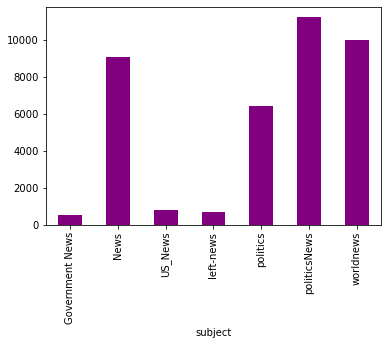

In [ ]:
new_df.groupby(['subject'])['text'].count().plot(kind="bar", color="purple")
plt.show()

In [ ]:
print (new_df['classe'].value_counts())

1    21192
0    17455
Name: classe, dtype: int64


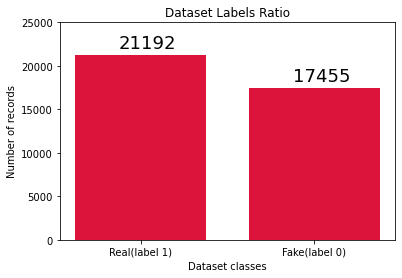

In [ ]:
x_labels = ['Real(label 1)', 'Fake(label 0)']
y_values = [df_True.shape[0],df_Fake.shape[0]]

fig, ax = plt.subplots() 
plt.bar(x_labels, y_values, align='center', width = 0.75, color='crimson')
plt.xlabel('Dataset classes')
plt.ylabel('Number of records')
plt.ylim((0, 25000))
plt.title('Dataset Labels Ratio')

for i, v in enumerate(x_labels):
    ax.text(i-0.125, y_values[i] + 800, y_values[i], fontsize=18)

plt.show()


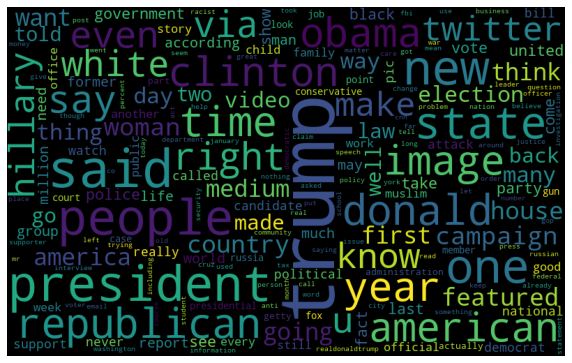

In [ ]:
fake_words = ' '.join([text for text in l_fake])

Fwordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(fake_words)
plt.figure(figsize=(10,7))
plt.imshow(Fwordcloud, interpolation='hermite')
plt.axis("off")
plt.show()

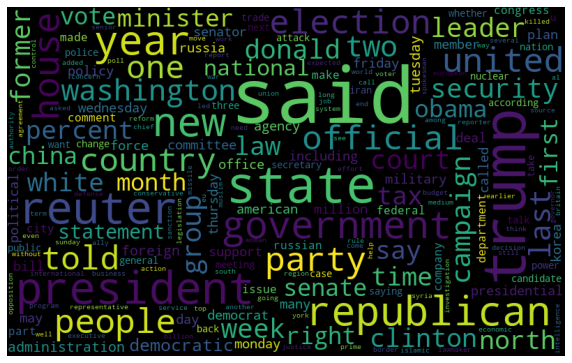

In [ ]:
real_words = ' '.join([text for text in l_real])

Rwordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(real_words)

plt.figure(figsize=(10,7))
plt.imshow(Rwordcloud, interpolation='hermite')
plt.axis("off")
plt.show()

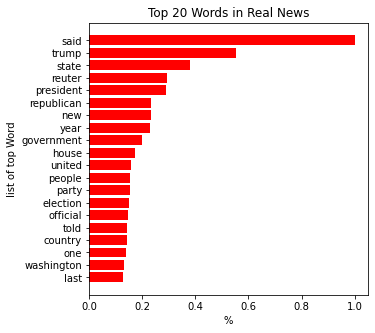

In [ ]:
TopRealWords = dict(itertools.islice(Rwordcloud.words_.items(), 20))

real_Top_Words = []
RRatios = []

for name, age in TopRealWords.items():
    real_Top_Words.append(name)
    RRatios.append(age)

result1 = np.arange(len(real_Top_Words))    

plt.figure(figsize=[5,5])
plt.barh(real_Top_Words,RRatios, align='center', color='red')
plt.xlabel('%')
plt.ylabel('list of top Word')
plt.gca().invert_yaxis()
plt.title('Top 20 Words in Real News')

plt.show()

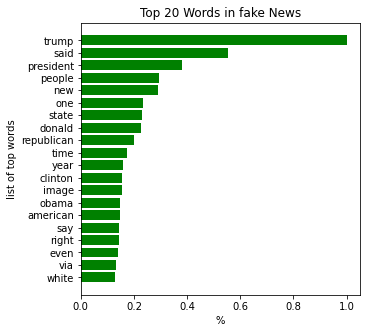

In [ ]:
TopfakeWords = dict(itertools.islice(Fwordcloud.words_.items(), 20))

fake_Top_Words = []
FRatios = []

for name, age in TopfakeWords.items():
    fake_Top_Words.append(name)
    FRatios.append(age)

result2 = np.arange(len(fake_Top_Words))    

plt.figure(figsize=[5,5])
plt.barh(fake_Top_Words,RRatios, align='center', color='green')
plt.xlabel('%')
plt.ylabel('list of top words')
plt.gca().invert_yaxis()
plt.title('Top 20 Words in fake News')

plt.show()